# Машинное обучение

## Факультет математики НИУ ВШЭ

### 2018-2019 учебный год


Лектор: Илья Щуров

Семинаристы: Евгения Ческидова, Евгений Ковалев

Ассистенты: Константин Ваниев, Софья Дымченко

# Семинар 14


**Алгоритм k-means для задачи кластеризации**

<img src="http://dendroid.sk/wp-content/uploads/2013/01/kmeansimg-scaled1000.jpg" width=400>

Алгоритм k-means применяется для задачи кластеризации. Напомню его основные шаги. Пусть у нас имеется N точек на плоскости ${(x_1,y_1),...,(x_N,y_N)}$
Допустим мы хотим разбить их на k=3 кластера.
1. Выбираем k=3 случайные точки из этого множества. Говорим, что они являются теперь центрами наших кластеров.
2. Для каждой из оставшихся точек смотрим, к какому из центров она ближе и определяем её в этот кластер.
3. У нас получилось разбить точки на 3 кластера. Естественно это не оптимальное разбиение. Найдём новые центры кластеров. Например, если точки ${(x_{i_1}, y_{i_1}),...,(x_{i_n}, y_{i_n})}$ попали в один кластер, то их новый центр будет имеет координаты:
$$x_M=\frac{x_{i_1}+...+x_{i_n}}{n}$$
$$y_M=\frac{y_{i_1}+...+y_{i_n}}{n}$$
4. Переходим к шагу 2 и продолжаем до тех пор, пока кластеры не перестанут меняться.

[Ссылка на визуализацию](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

# Задание 
Запрограммируйте K-Means


In [2]:
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/fogside/virtens/py3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5,1,'Кластеры сложной структуры')

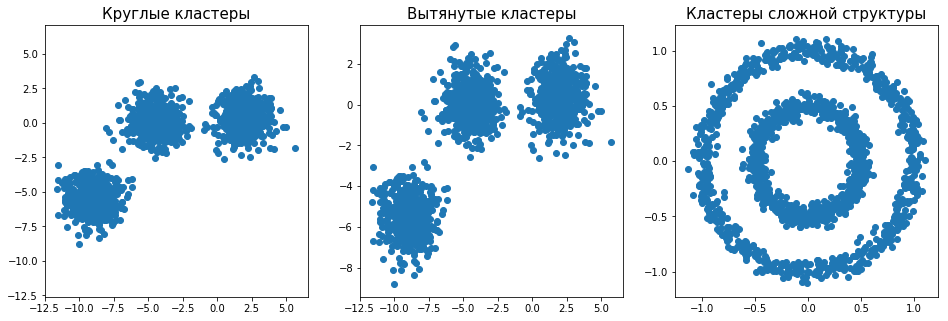

In [55]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

plt.figure(figsize=(16, 5))

X, y = make_blobs(n_samples=1500, centers=3, random_state=170)
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], edgecolors='face')
plt.axis('equal') # чтобы рисунок был не растянут
plt.title(u"Круглые кластеры", fontsize=15)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]] # матрица преобразования
X_long = np.dot(X, transformation) # умножим на нее, чтобы растянуть кучки

X_long = X
plt.subplot(132)
plt.scatter(X_long[:, 0], X_long[:, 1], edgecolors='face')
plt.title(u"Вытянутые кластеры", fontsize=15)

X_circles, y = make_circles(n_samples=1500, factor=0.5, noise=0.05)
plt.subplot(133)
plt.scatter(X_circles[:, 0], X_circles[:, 1], edgecolors='face')
plt.title(u"Кластеры сложной структуры", fontsize=15)


In [37]:
from copy import deepcopy

In [45]:
# Код алгоритма
def k_means(points_input: np.array, num_clusters: int, max_iter:int = 100):
    """
    points: список из пар координат точек
    num_clusters: число кластеров, на которое необходимо поделить

    return: номера кластеров и их центры
    """
    points = deepcopy(points_input)
    num_points = len(points)
    # Выбираем начальные центры кластеров (просто первые num_clusters точек)
    centroids = points[:num_clusters]
    # В качестве результата будет массив с номерами кластеров для каждой точки
    result = [-1] * num_points
    # Предыдущая копия массива result, чтобы сравнивать, поменялось что-то или нет
    prev_result = None
    
    # Выведем на экран стартовую ситуацию
    print("Входные данные")
    points_x = points[:,0]
    points_y = points[:,1]
    plt.scatter(x=points_x, y=points_y)
    plt.show()
    
    it_num = 0
    # Работаем до тех пор, пока кластеры не перестанут меняться
    while (it_num<max_iter) or (result != prev_result):
        prev_result = list(result)
        # Определяем каждую точку к кластеру
        # твой код тут # (つ▀¯▀)つ  
        
        
        # Меняем центры кластеров
        # твой код тут # (つ▀¯▀)つ
        
            
        # Выведем то, что у нас получилось
        print("Итерация №{}".format(it_num))
        it_num += 1
        points_x = points[:,0]
        points_y = points[:,1]    
        plt.scatter(x=points_x, y=points_y, c=result)
        plt.show()
        result = list(result)
    return result, centroids    

In [46]:
X, y = make_blobs(n_samples=1500, centers=3, random_state=170)

Входные данные


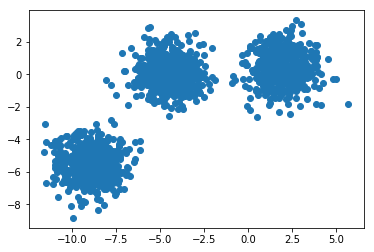

Итерация №0


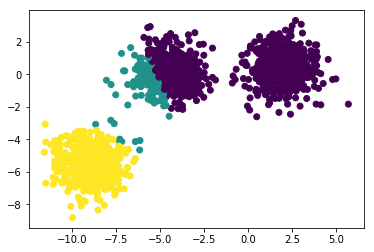

Итерация №1


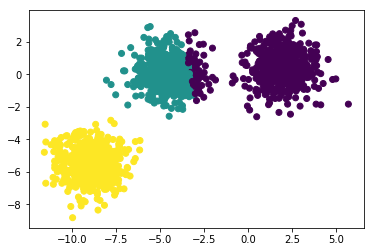

Итерация №2


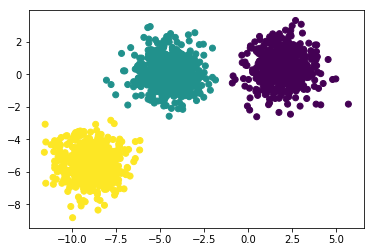

Итерация №3


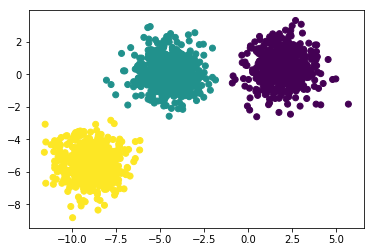

Итерация №4


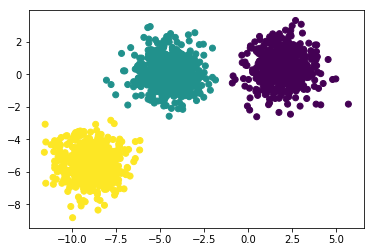

In [48]:
result, centroids = k_means(X, num_clusters=3, max_iter=5)

# Task2

Воспользуйтесь реализацией Kmeans из sklearn и провизуализируйте результат кластеризации на 3 класса для следующего датасета (сохраните результат, он еще пригодится нам):

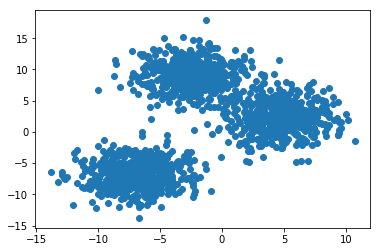

In [63]:
X_noised, y_noised = make_blobs(n_samples=1500, centers=3, cluster_std=2.3, random_state=42)
plt.scatter(X_noised[:,0], X_noised[:,1])
plt.show()

In [ ]:
# твой код тут # (つ▀¯▀)つ

# Спектральная кластеризация

Состоит из 3х шагов:

1. Для входных данных размерностью $(N, d)$ считаем матрицу схожести $A$ размерностью $(N,N)$
    * В простейшем случае это могут быть попарные расстояния, но на самом деле матрица может быть получена и с использованием более сложных операций над парами точек
    
    
2. Полученная матрица симметрична. Вычисляем для нее матрицу Лапласиана:

$${\displaystyle L=D-A}$$
где ${\displaystyle D}$  диагональная матрица, такая что:

$${\displaystyle D_{ii}=\sum _{j}A_{ij}.}$$

В самом алгоритме используется нормализованная версия Лапласиана

3. Подсчет собственных векторов для матрицы Лапласиана и кластеризация этих векторов подручными методами, например, с помощью того же K-means

In [49]:
import numpy
import scipy
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances


def laplacian(A):
    """Computes the symetric normalized laplacian.
    L = D^{-1/2} A D^{-1/2}
    """
    D = numpy.zeros(A.shape)
    w = numpy.sum(A, axis=0)
    D.flat[::len(w) + 1] = w ** (-0.5)  # set the diag of D to w
    return D.dot(A).dot(D)


def k_means(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1231)
    return kmeans.fit(X).labels_


def spectral_clustering(affinity, n_clusters, cluster_method=k_means):
    L = laplacian(affinity)
    eig_val, eig_vect = scipy.sparse.linalg.eigs(L, n_clusters)
    X = eig_vect.real
    rows_norm = numpy.linalg.norm(X, axis=1, ord=2)
    Y = (X.T / rows_norm).T
    labels = cluster_method(Y, n_clusters)
    return labels

In [50]:
A = pairwise_distances(X)
A.shape

(1500, 1500)

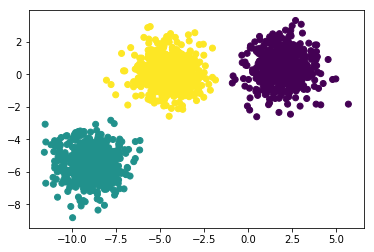

In [52]:
labels = spectral_clustering(A, n_clusters=3)
points_x = X[:,0]
points_y = X[:,1]    
plt.scatter(x=points_x, y=points_y, c=labels)
plt.show()

# Task3

Сделайте кластеризацию с помощью sklearn для того же датасета `X_noised`, запомните результат в свою переменную, провизуализируйте.

# Агломеративная кластеризация

Наверное самый простой и понятный алгоритм кластеризации без фиксированного числа кластеров — агломеративная кластеризация.

Интуиция у алгоритма очень простая:

1. Начинаем с того, что высыпаем на каждую точку свой кластер
2. Сортируем попарные расстояния между центрами кластеров по возрастанию
3. Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера
4. Повторяем п. 2 и 3 до тех пор, пока все данные не склеятся в один кластер

Сам процесс поиска ближайших кластеров может происходить с использованием разных методов объединения точек:

* Single linkage — минимум попарных расстояний между точками из двух кластеров
* Complete linkage — максимум попарных расстояний между точками из двух кластеров
* Average linkage — среднее попарных расстояний между точками из двух кластеров
* Centroid linkage — расстояние между центроидами двух кластеров


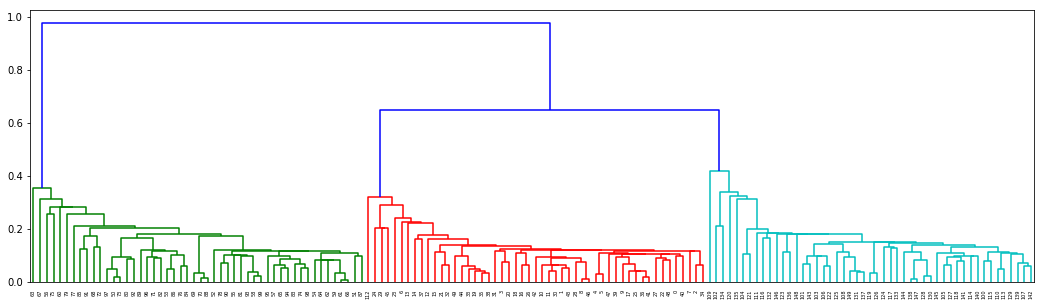

In [54]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(18, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5)

К счастью, в sklearn аггломеративную кластеризацию можно делать также просто и приятно, как и все прочие вещи из sklearn.

# Task4
Ну, вероятно вы уже догадались что тут нужно сделать:)

# Метрики кластеризации

### Adjusted Rand Index (ARI)

Как можно догадаться по названию, это "подкрученная" метрика `Random Index`:

${\displaystyle RI={\frac {a+b}{a+b+c+d}}={\frac {a+b}{n \choose 2}}}$

Для набора из $n$ элементов $S$ и двух возможных разбиений $S$ на кластера  $X$ и $Y$

* $  a$, количество пар элементов в $  S$, которые находятся в одном и том же подмножестве в  $X$ и в одном и том же подмножестве в $  Y$
* $b$, количество пар элементов в $S$, которые находятся в разных подмножествах в $ X$ и в разных подмножествах в $  Y$

* $  c$, количество пар элементов в $ S$, которые находятся в одном и том же подмножестве в $  X$ и в разных подмножествах в $  Y$
* $  d$, количество пар элементов в $ S$, которые находятся в разных подмножествах в $  X$ и в одном и том же подмножестве в $  Y$

 Метрика $ARI$ делает поправку на то, чтобы случайное разметка $S$ на кластера имела бы метрику равной нулю.

$${\displaystyle \overbrace {ARI} ^{\text{Adjusted Index}}={\frac {\overbrace {\sum _{ij}{\binom {n_{ij}}{2}}} ^{\text{Index}}-\overbrace {[\sum _{i}{\binom {a_{i}}{2}}\sum _{j}{\binom {b_{j}}{2}}]/{\binom {n}{2}}} ^{\text{Expected Index}}}{\underbrace {{\frac {1}{2}}[\sum _{i}{\binom {a_{i}}{2}}+\sum _{j}{\binom {b_{j}}{2}}]} _{\text{Max Index}}-\underbrace {[\sum _{i}{\binom {a_{i}}{2}}\sum _{j}{\binom {b_{j}}{2}}]/{\binom {n}{2}}} _{\text{Expected Index}}}}}$$

In [64]:
from sklearn.metrics import adjusted_rand_score

# Task 5

Посчитайте метрику ARI для всех использованных вами алгоритмов кластеризации для датасета `X_noised`

# Task 6

Найдите в интернете картинку, подгрузите ее и примените алгоритм кластеризации. 

Посмотрите что вышло.

image shape:  (225, 400, 3)


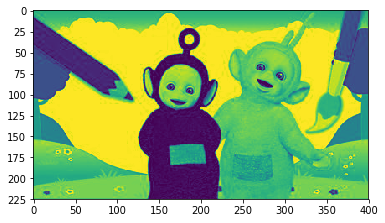

In [70]:
from PIL import Image
import urllib

def load_image(infilename):
    if infilename.startswith('https'):
        f = urllib.request.urlopen(infilename)
        img = Image.open(f)
    else:
        img = Image.open(infilename)
    img.load()
    data = np.asarray(img, dtype="float32")
    return data

def save_image(img,outfilename):
    img.save(outfilename)
    

url="https://ichef.bbci.co.uk/childrens-responsive-ichef-ck/400xn/amz/cbeebies/teletubbies-map-hero.jpg"
pic = load_image(url)
print("image shape: ", pic.shape)
plt.imshow(pic[:,:,1])
plt.show()

Для картинки нужно уменьшить число цветов в палитре; для этого нужно выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения; после выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру. Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
Можно использовать и другие:

* MeanShift
* AgglomerativeClustering

Какие угодно, какие сможете найти
Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики [SSIM](http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim). Какой способ оказался лучшим?

Приведите примеры работы лучшего алгоритма на выбранных вами любых картинках :)